In [1]:
import pandas as pd
import numpy as np
# data.csv 불러오기
df = pd.read_csv('data3.csv')

df.head()

,Year,Regn,Aslt,Fraud,Drug,Thief,Popln,Incme,StnNo,Police,...,CPI,Aging,Dens,Estab,Multi,Crime_Aslt,Crime_Fraud,Crime_Drug,Crime_Thief,Crime
0,2023,경기고양,2178,5695,223,2786,1087607,2530948,18,590.0,...,129.2,147.1,4055.964945,76.0,6717.0,200.256159,523.626641,20.503730,256.158704,1000.545234
1,2023,경기과천,90,259,11,271,81219,3140116,2,179.0,...,129.2,96.6,2264.259827,0.0,258.0,110.811510,318.890900,13.543629,333.665768,776.911806
2,2023,경기광명,674,1679,42,968,283124,2765984,6,497.0,...,129.2,144.4,7350.051921,145.0,1885.0,238.058236,593.026377,14.834489,341.899662,1187.818765
3,2023,경기광주,1071,1988,53,1012,404270,2754320,9,475.0,...,129.2,132.7,938.003202,35.0,3736.0,264.921958,491.750563,13.110050,250.327751,1020.110322
4,2023,경기구리,400,886,35,538,188634,2379973,5,376.0,...,129.2,154.1,5657.888422,184.0,1013.0,212.050850,469.692632,18.554449,285.208393,985.506324


In [2]:
# 지역(Regn)을 기준으로 정렬
df = df.sort_values(by=['Regn'])

In [3]:
# 전처리
# 인구수와 범죄횟수, 지역명, 날짜 칼럼 삭제
df = df.drop(columns=['Popln', 'Aslt', 'Fraud', 'Drug', 'Thief', 'Regn', 'Year', 'Crime', 'CPI'])
df.head()

# 최종칼럼:
# Incme	    StnNo	     Police	   Float	  Unemp	  CPI	         Aging	    Dens	  Estab	        Multi	        Crime
# 평균소득   지역내파출소  경찰관수   유동인구   실업율   소비자물가지수  노령화인구  인구밀도   유흥주점수     다문화가구수     범죄율

,Incme,StnNo,Police,Float,Unemp,Aging,Dens,Estab,Multi,Crime_Aslt,Crime_Fraud,Crime_Drug,Crime_Thief
386,2124210,7,412.0,231.0,1.9,216.3,204.610743,216.0,1086.0,216.937055,395.370131,7.982532,343.718451
338,2268741,7,414.0,233.0,2.0,236.7,203.088881,214.0,1100.0,228.024278,498.625704,4.730794,298.986191
216,2350665,7,418.0,235.0,1.6,258.8,201.223062,213.0,1187.0,244.462588,680.866505,17.188776,359.531892
433,2018895,7,412.0,222.0,3.3,200.5,204.952778,216.0,1017.0,314.549435,498.778836,8.906765,300.017345
481,1957219,7,411.0,227.0,2.4,186.5,205.069031,221.0,914.0,314.371117,484.440738,12.181295,340.139242


In [4]:
# 결측치 확인
print(df.isnull().sum())

# 결측치를 근처 값으로 대체
df = df.fillna(method='ffill')

# print
df.head()

Incme          0
StnNo          0
Police         7
Float          6
Unemp          7
Aging          1
Dens           0
Estab          7
Multi          1
Crime_Aslt     0
Crime_Fraud    0
Crime_Drug     0
Crime_Thief    0
dtype: int64


C:\Users\qkrwn\AppData\Local\Temp\ipykernel_16292\1223705685.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Incme,StnNo,Police,Float,Unemp,Aging,Dens,Estab,Multi,Crime_Aslt,Crime_Fraud,Crime_Drug,Crime_Thief
386,2124210,7,412.0,231.0,1.9,216.3,204.610743,216.0,1086.0,216.937055,395.370131,7.982532,343.718451
338,2268741,7,414.0,233.0,2.0,236.7,203.088881,214.0,1100.0,228.024278,498.625704,4.730794,298.986191
216,2350665,7,418.0,235.0,1.6,258.8,201.223062,213.0,1187.0,244.462588,680.866505,17.188776,359.531892
433,2018895,7,412.0,222.0,3.3,200.5,204.952778,216.0,1017.0,314.549435,498.778836,8.906765,300.017345
481,1957219,7,411.0,227.0,2.4,186.5,205.069031,221.0,914.0,314.371117,484.440738,12.181295,340.139242


In [5]:
# 랜덤 시드 고정
np.random.seed(13)  # 원하는 정수 값으로 변경 가능

# 데이터 증강
def bootstrap_resample(df, n_samples):
    indices = np.random.choice(df.index, size=n_samples, replace=True)
    resampled_df = df.loc[indices]
    return resampled_df

# 증강할 데이터 수 설정
n_augmented_samples = 600

# 부트스트랩 적용
augmented_df = bootstrap_resample(df, n_augmented_samples)

# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_df])

# 결과 확인
print(df.shape)

(1204, 13)


In [6]:
# 각 범죄율 내에서 다른 범죄율 칼럼은 제외
df_Crime_Aslt = df.drop(columns=['Crime_Fraud', 'Crime_Drug', 'Crime_Thief'])
df_Crime_Fraud = df.drop(columns=['Crime_Aslt', 'Crime_Drug', 'Crime_Thief'])
df_Crime_Drug = df.drop(columns=['Crime_Aslt', 'Crime_Fraud', 'Crime_Thief'])
df_Crime_Thief = df.drop(columns=['Crime_Aslt', 'Crime_Fraud', 'Crime_Drug'])

# Crime_Aslt, Crime_Fraud, Crime_Drug, Crime_Thief
# 각 범죄율과 다른 칼럼간의 상관계수 확인
print(df_Crime_Aslt.corr()['Crime_Aslt'].sort_values(ascending=False))
print(df_Crime_Fraud.corr()['Crime_Fraud'].sort_values(ascending=False))
print(df_Crime_Drug.corr()['Crime_Drug'].sort_values(ascending=False))
print(df_Crime_Thief.corr()['Crime_Thief'].sort_values(ascending=False))

Crime_Aslt    1.000000
Police        0.309715
Unemp         0.295352
Dens          0.281452
Estab         0.233249
Multi         0.226984
Float         0.169325
StnNo         0.129794
Incme         0.036247
Aging        -0.276899
Name: Crime_Aslt, dtype: float64
Crime_Fraud    1.000000
Incme          0.307208
Dens           0.272474
Police         0.258744
Estab          0.234447
Unemp          0.231440
Multi          0.163505
StnNo          0.139494
Float          0.133862
Aging         -0.102974
Name: Crime_Fraud, dtype: float64
Crime_Drug    1.000000
Aging         0.349585
Incme         0.249216
Dens          0.196118
Police       -0.023821
Estab        -0.053780
Multi        -0.092642
Unemp        -0.104249
StnNo        -0.113166
Float        -0.137000
Name: Crime_Drug, dtype: float64
Crime_Thief    1.000000
Dens           0.308465
Police         0.281356
Incme          0.249993
Estab          0.220456
Unemp          0.207570
Multi          0.165869
Float          0.138983
StnNo   

In [7]:
# 각 df별 상관계수가 절대값으로 높은 칼럼들 7개만 선택
cols_aslt = df_Crime_Aslt.corr()['Crime_Aslt'].abs().sort_values(ascending=False).index[:7]
cols_fraud = df_Crime_Fraud.corr()['Crime_Fraud'].abs().sort_values(ascending=False).index[:7]
cols_drug = df_Crime_Drug.corr()['Crime_Drug'].abs().sort_values(ascending=False).index[:7]
cols_thief = df_Crime_Thief.corr()['Crime_Thief'].abs().sort_values(ascending=False).index[:7]

df_Crime_Aslt = df_Crime_Aslt[cols_aslt]
df_Crime_Fraud = df_Crime_Fraud[cols_fraud]
df_Crime_Drug = df_Crime_Drug[cols_drug]
df_Crime_Thief = df_Crime_Thief[cols_thief]

df_Crime_Aslt.head(), df_Crime_Fraud.head(), df_Crime_Drug.head(), df_Crime_Thief.head()

(     Crime_Aslt  Police  Unemp        Dens  Aging  Estab   Multi
 386  216.937055   412.0    1.9  204.610743  216.3  216.0  1086.0
 338  228.024278   414.0    2.0  203.088881  236.7  214.0  1100.0
 216  244.462588   418.0    1.6  201.223062  258.8  213.0  1187.0
 433  314.549435   412.0    3.3  204.952778  200.5  216.0  1017.0
 481  314.371117   411.0    2.4  205.069031  186.5  221.0   914.0,
      Crime_Fraud    Incme        Dens  Police  Estab  Unemp   Multi
 386   395.370131  2124210  204.610743   412.0  216.0    1.9  1086.0
 338   498.625704  2268741  203.088881   414.0  214.0    2.0  1100.0
 216   680.866505  2350665  201.223062   418.0  213.0    1.6  1187.0
 433   498.778836  2018895  204.952778   412.0  216.0    3.3  1017.0
 481   484.440738  1957219  205.069031   411.0  221.0    2.4   914.0,
      Crime_Drug  Aging    Incme        Dens  Float  StnNo  Unemp
 386    7.982532  216.3  2124210  204.610743  231.0      7    1.9
 338    4.730794  236.7  2268741  203.088881  233.0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 각 범죄율을 키값으로 학습 데이터 생성
X_Aslt = df_Crime_Aslt.drop(columns=['Crime_Aslt'])
y_Aslt = df_Crime_Aslt['Crime_Aslt']

X_Fraud = df_Crime_Fraud.drop(columns=['Crime_Fraud'])
y_Fraud = df_Crime_Fraud['Crime_Fraud']

X_Drug = df_Crime_Drug.drop(columns=['Crime_Drug'])
y_Drug = df_Crime_Drug['Crime_Drug']

X_Thief = df_Crime_Thief.drop(columns=['Crime_Thief'])
y_Thief = df_Crime_Thief['Crime_Thief']

# train_test_split을 사용하여 학습 데이터와 테스트 데이터로 분리
X_train_Aslt, X_test_Aslt, y_train_Aslt, y_test_Aslt = train_test_split(X_Aslt, y_Aslt, test_size=0.2, random_state=42)
X_train_Fraud, X_test_Fraud, y_train_Fraud, y_test_Fraud = train_test_split(X_Fraud, y_Fraud, test_size=0.2, random_state=42)
X_train_Drug, X_test_Drug, y_train_Drug, y_test_Drug = train_test_split(X_Drug, y_Drug, test_size=0.2, random_state=42)
X_train_Thief, X_test_Thief, y_train_Thief, y_test_Thief = train_test_split(X_Thief, y_Thief, test_size=0.2, random_state=42)

# 각 범죄율 별 XGBoost 모델 학습
from xgboost import XGBRegressor

# Aslt 모델 학습
model_Aslt = XGBRegressor(n_estimators=700,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

model_Aslt.fit(X_train_Aslt, y_train_Aslt)

# Fraud 모델 학습
model_Fraud = XGBRegressor(n_estimators=700,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

model_Fraud.fit(X_train_Fraud, y_train_Fraud)

# Drug 모델 학습
model_Drug = XGBRegressor(n_estimators=700,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

model_Drug.fit(X_train_Drug, y_train_Drug)

# Thief 모델 학습
model_Thief = XGBRegressor(n_estimators=700,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

model_Thief.fit(X_train_Thief, y_train_Thief)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# 각 범죄율 별 RF 모델 학습
from sklearn.ensemble import RandomForestRegressor

# Aslt 모델 학습
model_Aslt_RF = RandomForestRegressor(n_estimators=700, max_depth=3, random_state=42)
model_Aslt_RF.fit(X_train_Aslt, y_train_Aslt)

# Fraud 모델 학습
model_Fraud_RF = RandomForestRegressor(n_estimators=700, max_depth=3, random_state=42)
model_Fraud_RF.fit(X_train_Fraud, y_train_Fraud)

# Drug 모델 학습
model_Drug_RF = RandomForestRegressor(n_estimators=700, max_depth=3, random_state=42)
model_Drug_RF.fit(X_train_Drug, y_train_Drug)

# Thief 모델 학습
model_Thief_RF = RandomForestRegressor(n_estimators=700, max_depth=3, random_state=42)
model_Thief_RF.fit(X_train_Thief, y_train_Thief)

RandomForestRegressor(max_depth=3, n_estimators=700, random_state=42)

In [ ]:
# 각 범죄율 별 SVR 모델 학습
from sklearn.svm import SVR

# Aslt 모델 학습
model_Aslt_SVR = SVR(kernel='rbf', C=1.0, gamma='scale')
model_Aslt_SVR.fit(X_train_Aslt, y_train_Aslt)

# Fraud 모델 학습
model_Fraud_SVR = SVR(kernel='rbf', C=1.0, gamma='scale')
model_Fraud_SVR.fit(X_train_Fraud, y_train_Fraud)

# Drug 모델 학습
model_Drug_SVR = SVR(kernel='rbf', C=1.0, gamma='scale')
model_Drug_SVR.fit(X_train_Drug, y_train_Drug)

# Thief 모델 학습
model_Thief_SVR = SVR(kernel='rbf', C=1.0, gamma='scale')
model_Thief_SVR.fit(X_train_Thief, y_train_Thief)

SVR()

In [19]:
# 각 범죄율 별 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression

# Aslt 모델 학습
model_Aslt_LR = LinearRegression()
model_Aslt_LR.fit(X_train_Aslt, y_train_Aslt)

# Fraud 모델 학습
model_Fraud_LR = LinearRegression()
model_Fraud_LR.fit(X_train_Fraud, y_train_Fraud)

# Drug 모델 학습
model_Drug_LR = LinearRegression()
model_Drug_LR.fit(X_train_Drug, y_train_Drug)

# Thief 모델 학습
model_Thief_LR = LinearRegression()
model_Thief_LR.fit(X_train_Thief, y_train_Thief)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# XGB 테스트 데이터 성능 평가
# Aslt 모델 테스트 성능 평가
y_test_pred_Aslt = model_Aslt.predict(X_test_Aslt)

mse_test = mean_squared_error(y_test_Aslt, y_test_pred_Aslt)
r2_test = r2_score(y_test_Aslt, y_test_pred_Aslt)

print("Aslt XGB Test MSE:", mse_test)
print("Aslt XGB Test R2:", r2_test)

# Fraud 모델 테스트 성능 평가
y_test_pred_Fraud = model_Fraud.predict(X_test_Fraud)

mse_test = mean_squared_error(y_test_Fraud, y_test_pred_Fraud)
r2_test = r2_score(y_test_Fraud, y_test_pred_Fraud)

print("Fraud XGB Test MSE:", mse_test)
print("Fraud XGB Test R2:", r2_test)

# Drug 모델 테스트 성능 평가
y_test_pred_Drug = model_Drug.predict(X_test_Drug)

mse_test = mean_squared_error(y_test_Drug, y_test_pred_Drug)
r2_test = r2_score(y_test_Drug, y_test_pred_Drug)

print("Drug XGB Test MSE:", mse_test)
print("Drug XGB Test R2:", r2_test)

# Thief 모델 테스트 성능 평가
y_test_pred_Thief = model_Thief.predict(X_test_Thief)

mse_test = mean_squared_error(y_test_Thief, y_test_pred_Thief)
r2_test = r2_score(y_test_Thief, y_test_pred_Thief)

print("Thief XGB Test MSE:", mse_test)
print("Thief XGB Test R2:", r2_test)

Aslt XGB Test MSE: 2101.5027161016446
Aslt XGB Test R2: 0.7429076935013692
Fraud XGB Test MSE: 11508.125428554375
Fraud XGB Test R2: 0.685225329385669
Drug XGB Test MSE: 174.55161777403887
Drug XGB Test R2: 0.5159860665020808
Thief XGB Test MSE: 3499.0040997519473
Thief XGB Test R2: 0.7759368170174208


In [20]:
# RF 테스트 데이터 성능 평가
# Aslt 모델 테스트 성능 평가
y_test_pred_Aslt_RF = model_Aslt_RF.predict(X_test_Aslt)

mse_test = mean_squared_error(y_test_Aslt, y_test_pred_Aslt_RF)
r2_test = r2_score(y_test_Aslt, y_test_pred_Aslt_RF)

print("Aslt RF Test MSE:", mse_test)
print("Aslt RF Test R2:", r2_test)

# Fraud 모델 테스트 성능 평가
y_test_pred_Fraud_RF = model_Fraud_RF.predict(X_test_Fraud)

mse_test = mean_squared_error(y_test_Fraud, y_test_pred_Fraud_RF)
r2_test = r2_score(y_test_Fraud, y_test_pred_Fraud_RF)

print("Fraud RF Test MSE:", mse_test)
print("Fraud RF Test R2:", r2_test)

# Drug 모델 테스트 성능 평가
y_test_pred_Drug_RF = model_Drug_RF.predict(X_test_Drug)

mse_test = mean_squared_error(y_test_Drug, y_test_pred_Drug_RF)
r2_test = r2_score(y_test_Drug, y_test_pred_Drug_RF)

print("Drug RF Test MSE:", mse_test)
print("Drug RF Test R2:", r2_test)

# Thief 모델 테스트 성능 평가
y_test_pred_Thief_RF = model_Thief_RF.predict(X_test_Thief)

mse_test = mean_squared_error(y_test_Thief, y_test_pred_Thief_RF)
r2_test = r2_score(y_test_Thief, y_test_pred_Thief_RF)

print("Thief RF Test MSE:", mse_test)
print("Thief RF Test R2:", r2_test)

Aslt RF Test MSE: 5082.921995282948
Aslt RF Test R2: 0.378168712556301
Fraud RF Test MSE: 18031.112825793265
Fraud RF Test R2: 0.5068060705641886
Drug RF Test MSE: 253.01407097136632
Drug RF Test R2: 0.29841764125209624
Thief RF Test MSE: 7194.755647950184
Thief RF Test R2: 0.5392746606453271


In [21]:
# SVR 테스트 데이터 성능 평가
# Aslt 모델 테스트 성능 평가
y_test_pred_Aslt_SVR = model_Aslt_SVR.predict(X_test_Aslt)

mse_test = mean_squared_error(y_test_Aslt, y_test_pred_Aslt_SVR)
r2_test = r2_score(y_test_Aslt, y_test_pred_Aslt_SVR)

print("Aslt SVM Test MSE:", mse_test)
print("Aslt SVM Test R2:", r2_test)

# Fraud 모델 테스트 성능 평가
y_test_pred_Fraud_SVR = model_Fraud_SVR.predict(X_test_Fraud)

mse_test = mean_squared_error(y_test_Fraud, y_test_pred_Fraud_SVR)
r2_test = r2_score(y_test_Fraud, y_test_pred_Fraud_SVR)

print("Fraud SVM Test MSE:", mse_test)
print("Fraud SVM Test R2:", r2_test)

# Drug 모델 테스트 성능 평가
y_test_pred_Drug_SVR = model_Drug_SVR.predict(X_test_Drug)

mse_test = mean_squared_error(y_test_Drug, y_test_pred_Drug_SVR)
r2_test = r2_score(y_test_Drug, y_test_pred_Drug_SVR)

print("Drug SVM Test MSE:", mse_test)
print("Drug SVM Test R2:", r2_test)

# Thief 모델 테스트 성능 평가
y_test_pred_Thief_SVR = model_Thief_SVR.predict(X_test_Thief)

mse_test = mean_squared_error(y_test_Thief, y_test_pred_Thief_SVR)
r2_test = r2_score(y_test_Thief, y_test_pred_Thief_SVR)

print("Thief SVM Test MSE:", mse_test)
print("Thief SVM Test R2:", r2_test)

Aslt SVM Test MSE: 7144.751201053513
Aslt SVM Test R2: 0.12592995880340985
Fraud SVM Test MSE: 35800.844212476506
Fraud SVM Test R2: 0.020761546729780367
Drug SVM Test MSE: 381.4620336131617
Drug SVM Test R2: -0.057755532281766
Thief SVM Test MSE: 15189.304079780262
Thief SVM Test R2: 0.02733357195919961


In [22]:
# LR 테스트 데이터 성능 평가
# Aslt 모델 테스트 성능 평가
y_test_pred_Aslt_LR = model_Aslt_LR.predict(X_test_Aslt)

mse_test = mean_squared_error(y_test_Aslt, y_test_pred_Aslt_LR)
r2_test = r2_score(y_test_Aslt, y_test_pred_Aslt_LR)

print("Aslt LR Test MSE:", mse_test)
print("Aslt LR Test R2:", r2_test)

# Fraud 모델 테스트 성능 평가
y_test_pred_Fraud_LR = model_Fraud_LR.predict(X_test_Fraud)

mse_test = mean_squared_error(y_test_Fraud, y_test_pred_Fraud_LR)
r2_test = r2_score(y_test_Fraud, y_test_pred_Fraud_LR)

print("Fraud LR Test MSE:", mse_test)
print("Fraud LR Test R2:", r2_test)

# Drug 모델 테스트 성능 평가
y_test_pred_Drug_LR = model_Drug_LR.predict(X_test_Drug)

mse_test = mean_squared_error(y_test_Drug, y_test_pred_Drug_LR)
r2_test = r2_score(y_test_Drug, y_test_pred_Drug_LR)

print("Drug LR Test MSE:", mse_test)
print("Drug LR Test R2:", r2_test)

# Thief 모델 테스트 성능 평가
y_test_pred_Thief_LR = model_Thief_LR.predict(X_test_Thief)

mse_test = mean_squared_error(y_test_Thief, y_test_pred_Thief_LR)
r2_test = r2_score(y_test_Thief, y_test_pred_Thief_LR)

print("Thief LR Test MSE:", mse_test)
print("Thief LR Test R2:", r2_test)

Aslt LR Test MSE: 6423.055591560232
Aslt LR Test R2: 0.21422029857453795
Fraud LR Test MSE: 27339.42428622586
Fraud LR Test R2: 0.2522015572467372
Drug LR Test MSE: 247.20139546226528
Drug LR Test R2: 0.31453560093178845
Thief LR Test MSE: 11217.396497397254
Thief LR Test R2: 0.2816797316234507


In [23]:
# XGB 훈련 데이터 성능 평가
# Aslt 모델 훈련 성능 평가
y_train_pred_Aslt = model_Aslt.predict(X_train_Aslt)

mse_train = mean_squared_error(y_train_Aslt, y_train_pred_Aslt)
r2_train = r2_score(y_train_Aslt, y_train_pred_Aslt)

print("Aslt XGB Train MSE:", mse_train)
print("Aslt XGB Train R2:", r2_train)

# Fraud 모델 훈련 성능 평가
y_train_pred_Fraud = model_Fraud.predict(X_train_Fraud)

mse_train = mean_squared_error(y_train_Fraud, y_train_pred_Fraud)
r2_train = r2_score(y_train_Fraud, y_train_pred_Fraud)

print("Fraud XGB Train MSE:", mse_train)    
print("Fraud XGB Train R2:", r2_train)

# Drug 모델 훈련 성능 평가
y_train_pred_Drug = model_Drug.predict(X_train_Drug)

mse_train = mean_squared_error(y_train_Drug, y_train_pred_Drug)
r2_train = r2_score(y_train_Drug, y_train_pred_Drug)

print("Drug XGB Train MSE:", mse_train)
print("Drug XGB Train R2:", r2_train)

# Thief 모델 훈련 성능 평가
y_train_pred_Thief = model_Thief.predict(X_train_Thief)

mse_train = mean_squared_error(y_train_Thief, y_train_pred_Thief)
r2_train = r2_score(y_train_Thief, y_train_pred_Thief)

print("Thief XGB Train MSE:", mse_train)
print("Thief XGB Train R2:", r2_train)

Aslt XGB Train MSE: 1838.5631666789373
Aslt XGB Train R2: 0.7690552698311628
Fraud XGB Train MSE: 10180.276092733111
Fraud XGB Train R2: 0.7260116993324879
Drug XGB Train MSE: 87.02559434431433
Drug XGB Train R2: 0.765485411527391
Thief XGB Train MSE: 3171.3914596199447
Thief XGB Train R2: 0.7969012694137263


In [24]:
# RF 훈련 데이터 성능 평가
# Aslt 모델 훈련 성능 평가
y_train_pred_Aslt_RF = model_Aslt_RF.predict(X_train_Aslt)

mse_train = mean_squared_error(y_train_Aslt, y_train_pred_Aslt_RF)
r2_train = r2_score(y_train_Aslt, y_train_pred_Aslt_RF)

print("Aslt RF Train MSE:", mse_train)
print("Aslt RF Train R2:", r2_train)

# Fraud 모델 훈련 성능 평가
y_train_pred_Fraud_RF = model_Fraud_RF.predict(X_train_Fraud)

mse_train = mean_squared_error(y_train_Fraud, y_train_pred_Fraud_RF)
r2_train = r2_score(y_train_Fraud, y_train_pred_Fraud_RF)

print("Fraud RF Train MSE:", mse_train)
print("Fraud RF Train R2:", r2_train)

# Drug 모델 훈련 성능 평가
y_train_pred_Drug_RF = model_Drug_RF.predict(X_train_Drug)

mse_train = mean_squared_error(y_train_Drug, y_train_pred_Drug_RF)
r2_train = r2_score(y_train_Drug, y_train_pred_Drug_RF)

print("Drug RF Train MSE:", mse_train)
print("Drug RF Train R2:", r2_train)

# Thief 모델 훈련 성능 평가
y_train_pred_Thief_RF = model_Thief_RF.predict(X_train_Thief)

mse_train = mean_squared_error(y_train_Thief, y_train_pred_Thief_RF)
r2_train = r2_score(y_train_Thief, y_train_pred_Thief_RF)

print("Thief RF Train MSE:", mse_train)
print("Thief RF Train R2:", r2_train)

Aslt RF Train MSE: 4203.015436883178
Aslt RF Train R2: 0.47205280538726957
Fraud RF Train MSE: 20228.160364657728
Fraud RF Train R2: 0.4555865446617223
Drug RF Train MSE: 174.25821012319426
Drug RF Train R2: 0.5304129464105838
Thief RF Train MSE: 6994.540387001723
Thief RF Train R2: 0.5520634107387317


In [25]:
# SVM 훈련 데이터 성능 평가
# Aslt 모델 훈련 성능 평가
y_train_pred_Aslt_SVR = model_Aslt_SVR.predict(X_train_Aslt)

mse_train = mean_squared_error(y_train_Aslt, y_train_pred_Aslt_SVR)
r2_train = r2_score(y_train_Aslt, y_train_pred_Aslt_SVR)

print("Aslt SVM Train MSE:", mse_train)
print("Aslt SVM Train R2:", r2_train)

# Fraud 모델 훈련 성능 평가
y_train_pred_Fraud_SVR = model_Fraud_SVR.predict(X_train_Fraud)

mse_train = mean_squared_error(y_train_Fraud, y_train_pred_Fraud_SVR)
r2_train = r2_score(y_train_Fraud, y_train_pred_Fraud_SVR)

print("Fraud SVM Train MSE:", mse_train)
print("Fraud SVM Train R2:", r2_train)

# Drug 모델 훈련 성능 평가
y_train_pred_Drug_SVR = model_Drug_SVR.predict(X_train_Drug)

mse_train = mean_squared_error(y_train_Drug, y_train_pred_Drug_SVR)
r2_train = r2_score(y_train_Drug, y_train_pred_Drug_SVR)

print("Drug SVM Train MSE:", mse_train)
print("Drug SVM Train R2:", r2_train)

# Thief 모델 훈련 성능 평가
y_train_pred_Thief_SVR = model_Thief_SVR.predict(X_train_Thief)

mse_train = mean_squared_error(y_train_Thief, y_train_pred_Thief_SVR)
r2_train = r2_score(y_train_Thief, y_train_pred_Thief_SVR)

print("Thief SVM Train MSE:", mse_train)
print("Thief SVM Train R2:", r2_train)

Aslt SVM Train MSE: 7280.250324277426
Aslt SVM Train R2: 0.085516626693389
Fraud SVM Train MSE: 36772.90941060393
Fraud SVM Train R2: 0.010307100884648701
Drug SVM Train MSE: 382.60339412955574
Drug SVM Train R2: -0.0310309076145745
Thief SVM Train MSE: 15350.764294333481
Thief SVM Train R2: 0.016923397377802796


In [26]:
# LR 훈련 데이터 성능 평가
# Aslt 모델 훈련 성능 평가
y_train_pred_Aslt_LR = model_Aslt_LR.predict(X_train_Aslt)

mse_train = mean_squared_error(y_train_Aslt, y_train_pred_Aslt_LR)
r2_train = r2_score(y_train_Aslt, y_train_pred_Aslt_LR)

print("Aslt LR Train MSE:", mse_train)
print("Aslt LR Train R2:", r2_train)

# Fraud 모델 훈련 성능 평가
y_train_pred_Fraud_LR = model_Fraud_LR.predict(X_train_Fraud)

mse_train = mean_squared_error(y_train_Fraud, y_train_pred_Fraud_LR)
r2_train = r2_score(y_train_Fraud, y_train_pred_Fraud_LR)

print("Fraud LR Train MSE:", mse_train)
print("Fraud LR Train R2:", r2_train)

# Drug 모델 훈련 성능 평가
y_train_pred_Drug_LR = model_Drug_LR.predict(X_train_Drug)

mse_train = mean_squared_error(y_train_Drug, y_train_pred_Drug_LR)
r2_train = r2_score(y_train_Drug, y_train_pred_Drug_LR)

print("Drug LR Train MSE:", mse_train)
print("Drug LR Train R2:", r2_train)

# Thief 모델 훈련 성능 평가
y_train_pred_Thief_LR = model_Thief_LR.predict(X_train_Thief)

mse_train = mean_squared_error(y_train_Thief, y_train_pred_Thief_LR)
r2_train = r2_score(y_train_Thief, y_train_pred_Thief_LR)

print("Thief LR Train MSE:", mse_train)
print("Thief LR Train R2:", r2_train)

Aslt LR Train MSE: 6749.337567974362
Aslt LR Train R2: 0.15220538967403885
Fraud LR Train MSE: 29974.977708908442
Fraud LR Train R2: 0.1932641973361764
Drug LR Train MSE: 280.24772298030945
Drug LR Train R2: 0.24479482248538253
Thief LR Train MSE: 13026.479900389046
Thief LR Train R2: 0.1657726378270321


In [41]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# 성능 평가 딕셔너리
performance_data = {
    'Model': ['XGB', 'RF', 'SVM', 'LR'],

    'Aslt Train MSE': [
        mean_squared_error(y_train_Aslt, y_train_pred_Aslt),
        mean_squared_error(y_train_Aslt, y_train_pred_Aslt_RF),
        mean_squared_error(y_train_Aslt, y_train_pred_Aslt_SVR),
        mean_squared_error(y_train_Aslt, y_train_pred_Aslt_LR),
    ],
    'Aslt Train R2': [
        r2_score(y_train_Aslt, y_train_pred_Aslt),
        r2_score(y_train_Aslt, y_train_pred_Aslt_RF),
        r2_score(y_train_Aslt, y_train_pred_Aslt_SVR),
        r2_score(y_train_Aslt, y_train_pred_Aslt_LR),
    ],
    'Aslt Test MSE': [
        mean_squared_error(y_test_Aslt, y_test_pred_Aslt),
        mean_squared_error(y_test_Aslt, y_test_pred_Aslt_RF),
        mean_squared_error(y_test_Aslt, y_test_pred_Aslt_SVR),
        mean_squared_error(y_test_Aslt, y_test_pred_Aslt_LR),
    ],
    'Aslt Test R2': [
        r2_score(y_test_Aslt, y_test_pred_Aslt),
        r2_score(y_test_Aslt, y_test_pred_Aslt_RF),
        r2_score(y_test_Aslt, y_test_pred_Aslt_SVR),
        r2_score(y_test_Aslt, y_test_pred_Aslt_LR),
    ],

    'Fraud Train MSE': [
        mean_squared_error(y_train_Fraud, y_train_pred_Fraud),
        mean_squared_error(y_train_Fraud, y_train_pred_Fraud_RF),
        mean_squared_error(y_train_Fraud, y_train_pred_Fraud_SVR),
        mean_squared_error(y_train_Fraud, y_train_pred_Fraud_LR),
    ],
    'Fraud Train R2': [
        r2_score(y_train_Fraud, y_train_pred_Fraud),
        r2_score(y_train_Fraud, y_train_pred_Fraud_RF),
        r2_score(y_train_Fraud, y_train_pred_Fraud_SVR),
        r2_score(y_train_Fraud, y_train_pred_Fraud_LR),
    ],
    'Fraud Test MSE': [
        mean_squared_error(y_test_Fraud, y_test_pred_Fraud),
        mean_squared_error(y_test_Fraud, y_test_pred_Fraud_RF),
        mean_squared_error(y_test_Fraud, y_test_pred_Fraud_SVR),
        mean_squared_error(y_test_Fraud, y_test_pred_Fraud_LR),
    ],
    'Fraud Test R2': [
        r2_score(y_test_Fraud, y_test_pred_Fraud),
        r2_score(y_test_Fraud, y_test_pred_Fraud_RF),
        r2_score(y_test_Fraud, y_test_pred_Fraud_SVR),
        r2_score(y_test_Fraud, y_test_pred_Fraud_LR),
    ],

    'Drug Train MSE': [
        mean_squared_error(y_train_Drug, y_train_pred_Drug),
        mean_squared_error(y_train_Drug, y_train_pred_Drug_RF),
        mean_squared_error(y_train_Drug, y_train_pred_Drug_SVR),
        mean_squared_error(y_train_Drug, y_train_pred_Drug_LR),
    ],
    'Drug Train R2': [
        r2_score(y_train_Drug, y_train_pred_Drug),
        r2_score(y_train_Drug, y_train_pred_Drug_RF),
        r2_score(y_train_Drug, y_train_pred_Drug_SVR),
        r2_score(y_train_Drug, y_train_pred_Drug_LR),
    ],
    'Drug Test MSE': [
        mean_squared_error(y_test_Drug, y_test_pred_Drug),
        mean_squared_error(y_test_Drug, y_test_pred_Drug_RF),
        mean_squared_error(y_test_Drug, y_test_pred_Drug_SVR),
        mean_squared_error(y_test_Drug, y_test_pred_Drug_LR),
    ],
    'Drug Test R2': [
        r2_score(y_test_Drug, y_test_pred_Drug),
        r2_score(y_test_Drug, y_test_pred_Drug_RF),
        r2_score(y_test_Drug, y_test_pred_Drug_SVR),
        r2_score(y_test_Drug, y_test_pred_Drug_LR),
    ],

    'Thief Train MSE': [
        mean_squared_error(y_train_Thief, y_train_pred_Thief),
        mean_squared_error(y_train_Thief, y_train_pred_Thief_RF),
        mean_squared_error(y_train_Thief, y_train_pred_Thief_SVR),
        mean_squared_error(y_train_Thief, y_train_pred_Thief_LR),
    ],
    'Thief Train R2': [
        r2_score(y_train_Thief, y_train_pred_Thief),
        r2_score(y_train_Thief, y_train_pred_Thief_RF),
        r2_score(y_train_Thief, y_train_pred_Thief_SVR),
        r2_score(y_train_Thief, y_train_pred_Thief_LR),
    ],
    'Thief Test MSE': [
        mean_squared_error(y_test_Thief, y_test_pred_Thief),
        mean_squared_error(y_test_Thief, y_test_pred_Thief_RF),
        mean_squared_error(y_test_Thief, y_test_pred_Thief_SVR),
        mean_squared_error(y_test_Thief, y_test_pred_Thief_LR),
    ],
    'Thief Test R2': [
        r2_score(y_test_Thief, y_test_pred_Thief),
        r2_score(y_test_Thief, y_test_pred_Thief_RF),
        r2_score(y_test_Thief, y_test_pred_Thief_SVR),
        r2_score(y_test_Thief, y_test_pred_Thief_LR),
    ],
}

# DataFrame 생성
performance_df = pd.DataFrame(performance_data)
performance_df.set_index('Model', inplace=True)
performance_df.columns.name = 'Model / Performance'

performance_df = performance_df.transpose()

# 결과 출력
performance_df

Model,XGB,RF,SVM,LR
Model / Performance,,,,
Aslt Train MSE,1838.563167,4203.015437,7280.250324,6749.337568
Aslt Train R2,0.769055,0.472053,0.085517,0.152205
Aslt Test MSE,2101.502716,5082.921995,7144.751201,6423.055592
Aslt Test R2,0.742908,0.378169,0.125930,0.214220
Fraud Train MSE,10180.276093,20228.160365,36772.909411,29974.977709
Fraud Train R2,0.726012,0.455587,0.010307,0.193264
Fraud Test MSE,11508.125429,18031.112826,35800.844212,27339.424286
Fraud Test R2,0.685225,0.506806,0.020762,0.252202
Drug Train MSE,87.025594,174.258210,382.603394,280.247723


In [42]:
# R² 값만 포함된 행 필터링
r2_df = performance_df[performance_df.index.str.contains('R2')]

# 결과 출력
r2_df

Model,XGB,RF,SVM,LR
Model / Performance,,,,
Aslt Train R2,0.769055,0.472053,0.085517,0.152205
Aslt Test R2,0.742908,0.378169,0.125930,0.214220
Fraud Train R2,0.726012,0.455587,0.010307,0.193264
Fraud Test R2,0.685225,0.506806,0.020762,0.252202
Drug Train R2,0.765485,0.530413,-0.031031,0.244795
Drug Test R2,0.515986,0.298418,-0.057756,0.314536
Thief Train R2,0.796901,0.552063,0.016923,0.165773
Thief Test R2,0.775937,0.539275,0.027334,0.281680


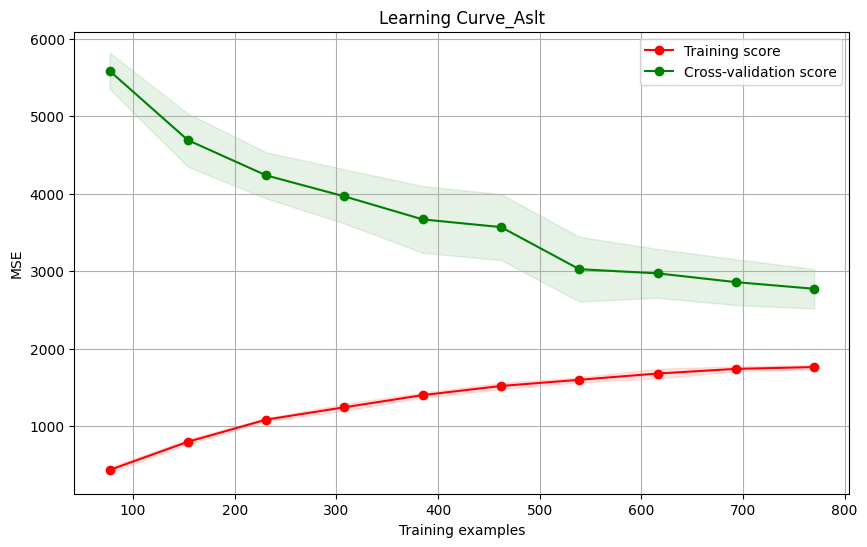

In [11]:
# XGB 러닝커브 그리기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Aslt 러닝커브 그리기
train_sizes, train_scores, test_scores = learning_curve(
    model_Aslt,
    X_train_Aslt,
    y_train_Aslt,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve_Aslt')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

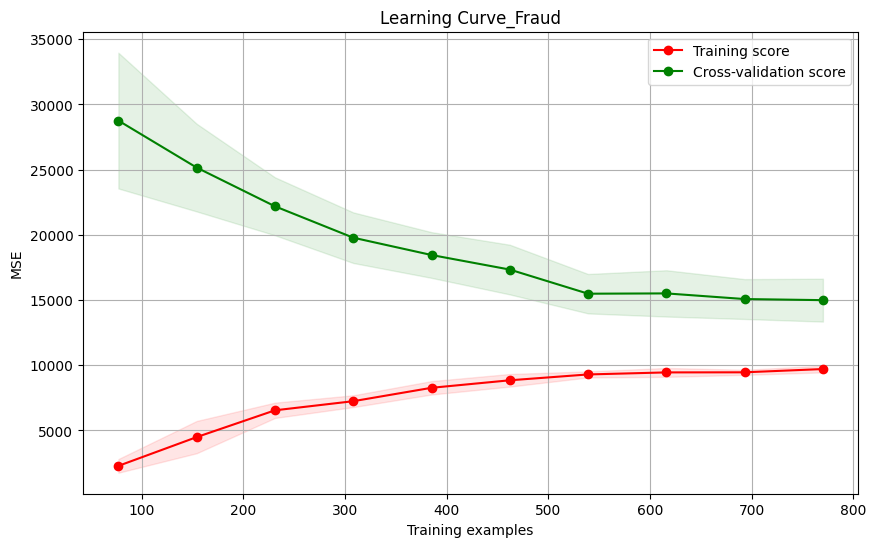

In [12]:
# Fraud 러닝커브 그리기
train_sizes, train_scores, test_scores = learning_curve(
    model_Fraud,
    X_train_Fraud,
    y_train_Fraud,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve_Fraud')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

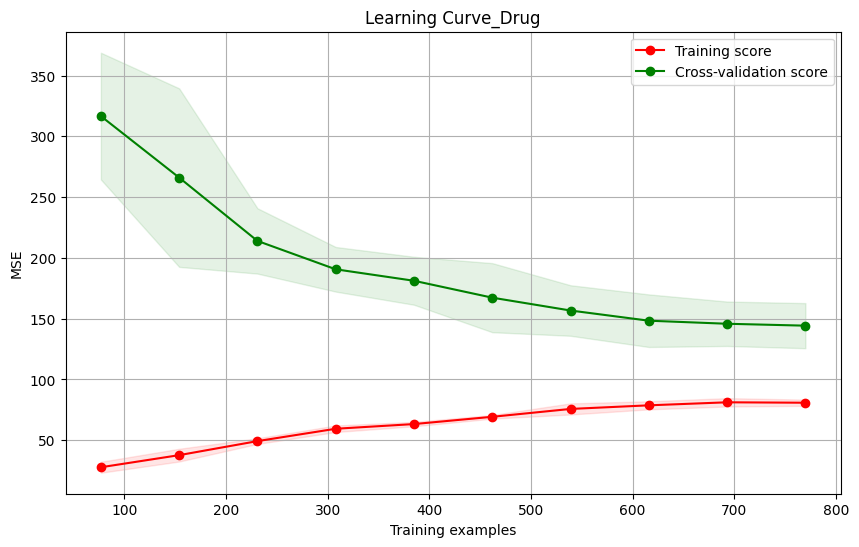

In [13]:
# Drug 러닝커브 그리기
train_sizes, train_scores, test_scores = learning_curve(
    model_Drug,
    X_train_Drug,
    y_train_Drug,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve_Drug')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

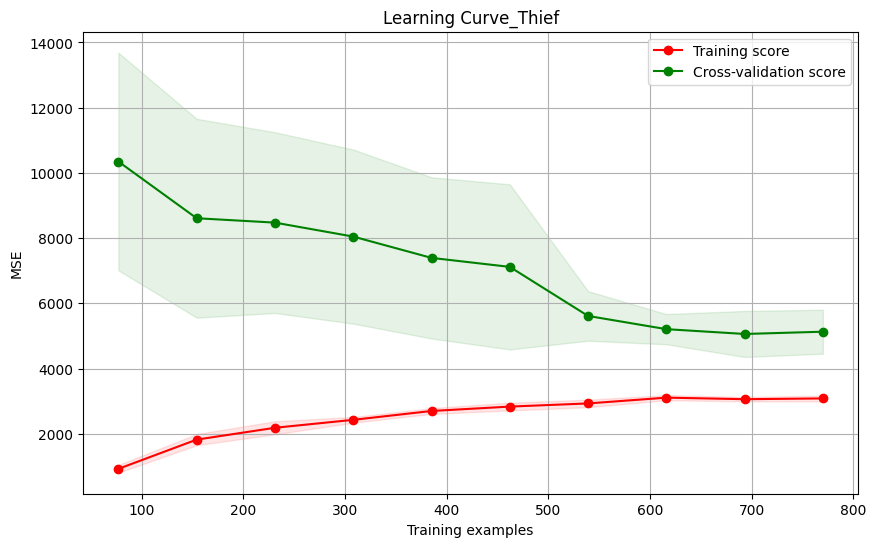

In [14]:
# Thief 러닝커브 그리기
train_sizes, train_scores, test_scores = learning_curve(
    model_Thief,
    X_train_Thief,
    y_train_Thief,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve_Thief')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()